# Capstone Project: Modeling - Classification Models

In [1]:
import warnings

warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import os

import json
import random

import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing for modeling
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn import metrics, linear_model, tree

# Classic ML Classification Models
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from imblearn.over_sampling import SMOTE

## Load Dataset

In [25]:
ml_df = pd.read_csv('data/ML_Dataset.csv')
ml_df = ml_df[['OMIT_CALL'] + [str(x) for x in list(range(2048))]]

## Train/Test Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(ml_df.drop(columns=['OMIT_CALL']), 
                                                    ml_df['OMIT_CALL'], 
                                                    test_size=0.20, 
                                                    random_state=42)

In [34]:
# sm = SMOTE(sampling_strategy='not majority', random_state=42, n_jobs=4)
# X_train, y_train = sm.fit_resample(X_train, y_train)

In [35]:
ovsmp = (y_train[y_train == 0].shape[0] / y_train.shape[0]) * 100
print('OMIT has been oversampled to %2.2f percent' % ovsmp)

OMIT has been oversampled to 8.69 percent


_______


# Classification Models

## Baseline Model

Since the class imbalance is roughy 10% for class 1 and 90% for class 2, we will use a All-positive baseline model which should have a approximate overall accuracy of 90%. 

In [9]:
baseline_pred_train = [1] * len(y_train)
baseline_pred_test = [1] * len(y_test)

In [10]:
print("Baseline Model: \t Test Set Accuracy = %2.2f" % accuracy_score(y_test, baseline_pred_test))

Baseline Model: 	 Test Set Accuracy = 0.91


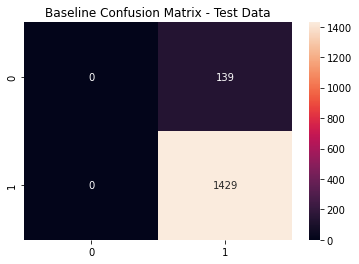

In [11]:
metrics.accuracy_score(y_test, baseline_pred_test)
baseline_cfm = metrics.confusion_matrix(y_test, baseline_pred_test)
sns.heatmap(baseline_cfm, annot=True, fmt='d')
plt.title('Baseline Confusion Matrix - Test Data')
plt.show()

_______


## Logistic Regression

Cost = 0.01 	 Testing Accuracy = 0.80 	     Training Accuracy = 0.84
Cost = 0.10 	 Testing Accuracy = 0.85 	     Training Accuracy = 0.91
Cost = 0.20 	 Testing Accuracy = 0.86 	     Training Accuracy = 0.93
Cost = 0.50 	 Testing Accuracy = 0.88 	     Training Accuracy = 0.95
Cost = 0.80 	 Testing Accuracy = 0.88 	     Training Accuracy = 0.95
Cost = 1.00 	 Testing Accuracy = 0.88 	     Training Accuracy = 0.96
Cost = 5.00 	 Testing Accuracy = 0.89 	     Training Accuracy = 0.98
Cost = 10.00 	 Testing Accuracy = 0.90 	     Training Accuracy = 0.98
Cost = 20.00 	 Testing Accuracy = 0.90 	     Training Accuracy = 0.99
Cost = 50.00 	 Testing Accuracy = 0.91 	     Training Accuracy = 0.99


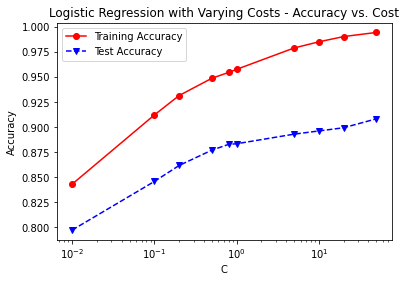

In [12]:
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
LRtrainAcc = []
LRtestAcc = []

for param in C:
    tlr = linear_model.LogisticRegression(penalty='l2', 
                                          solver='lbfgs',
                                          max_iter=2000,
                                          C=param, random_state=42)
    tlr.fit(X_train, y_train)
    tlr_pred_train = tlr.predict(X_train)
    tlr_pred_test = tlr.predict(X_test)
    LRtrainAcc.append(accuracy_score(y_train, tlr_pred_train))
    LRtestAcc.append(accuracy_score(y_test, tlr_pred_test))
    print('Cost = %2.2f \t Testing Accuracy = %2.2f \t \
    Training Accuracy = %2.2f' % (param,accuracy_score(y_test,tlr_pred_test),
                               accuracy_score(y_train,tlr_pred_train)))
    
fig, ax = plt.subplots()
ax.plot(C, LRtrainAcc, 'ro-', C, LRtestAcc,'bv--')
ax.legend(['Training Accuracy','Test Accuracy'])
plt.title('Logistic Regression with Varying Costs - Accuracy vs. Cost')
ax.set_xlabel('C')
ax.set_xscale('log')
ax.set_ylabel('Accuracy')
plt.show()

In [36]:
tlr = linear_model.LogisticRegression(penalty='l2', 
                                      solver='lbfgs',
                                      max_iter=2000,
                                      C=50, random_state=42)
tlr.fit(X_train, y_train)

LogisticRegression(C=50, max_iter=2000, random_state=42)

In [37]:
accuracy_score(y_test, tlr.predict(X_test))

0.9247448979591837

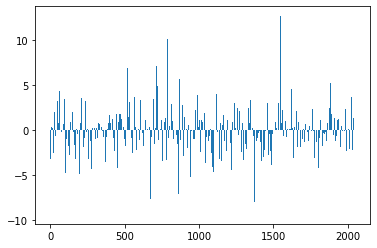

In [38]:
importance = tlr.coef_
# plot feature importance
plt.bar([x for x in range(len(importance[0]))], importance[0])
plt.show()

In [39]:
print(metrics.classification_report(y_test, tlr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.59      0.52      0.55       139
           1       0.95      0.96      0.96      1429

    accuracy                           0.92      1568
   macro avg       0.77      0.74      0.75      1568
weighted avg       0.92      0.92      0.92      1568



In [13]:
# Best hyperparameters
tlr = linear_model.LogisticRegression(penalty='l2', 
                                      solver='lbfgs',
                                      max_iter=2000,
                                      C=20, random_state=42)
tlr.fit(X_train, y_train)
tlr_pred_test = tlr.predict(X_test)
tlr_pred_testp = tlr.predict_proba(X_test)

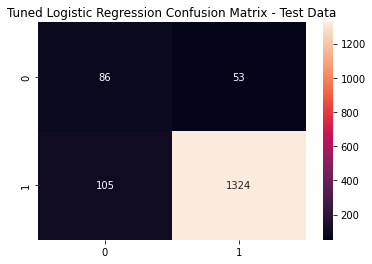

In [14]:
metrics.accuracy_score(y_test, tlr_pred_test)
tlr_cfm = metrics.confusion_matrix(y_test, tlr_pred_test)
sns.heatmap(tlr_cfm, annot=True, fmt='d')
plt.title('Tuned Logistic Regression Confusion Matrix - Test Data')
plt.show()

In [15]:
print(metrics.classification_report(y_test, tlr_pred_test))

              precision    recall  f1-score   support

           0       0.45      0.62      0.52       139
           1       0.96      0.93      0.94      1429

    accuracy                           0.90      1568
   macro avg       0.71      0.77      0.73      1568
weighted avg       0.92      0.90      0.91      1568



### Logistic Regression - Threshold Tuning

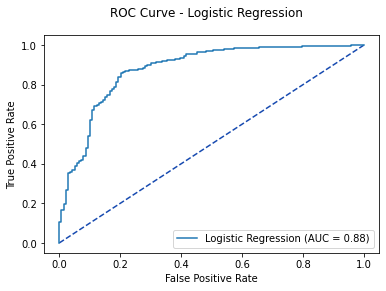

Optimal Threshold 0.894349


In [16]:
# Optimal Model predictions
tlr_pred = tlr_pred_testp[:, 1]

tlr_roc = metrics.roc_curve(y_test, tlr_pred)
tlr_auc = metrics.auc(tlr_roc[0], tlr_roc[1])
tlr_plot = metrics.RocCurveDisplay(fpr=tlr_roc[0], tpr=tlr_roc[1], 
                                   roc_auc=tlr_auc, estimator_name='Logistic Regression')

fig, ax = plt.subplots()
fig.suptitle('ROC Curve - Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
tlr_plot.plot(ax)
plt.show()

# Optimal Threshold value
tlr_opt = tlr_roc[2][np.argmax(tlr_roc[1] - tlr_roc[0])]

print('Optimal Threshold %f' % tlr_opt)

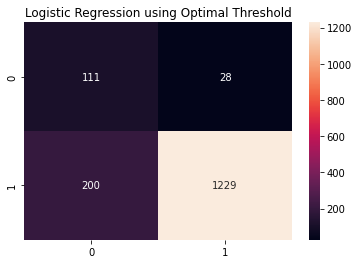

In [17]:
tlr_cfm = metrics.confusion_matrix(y_test, (tlr_pred >= tlr_opt).astype(int))
sns.heatmap(tlr_cfm, annot=True, fmt='g')
plt.title('Logistic Regression using Optimal Threshold')
plt.show()

In [18]:
print(metrics.classification_report(y_test, 
     (tlr_pred >= tlr_opt).astype(int)))

              precision    recall  f1-score   support

           0       0.36      0.80      0.49       139
           1       0.98      0.86      0.92      1429

    accuracy                           0.85      1568
   macro avg       0.67      0.83      0.70      1568
weighted avg       0.92      0.85      0.88      1568





_______
 
## Support Vector Machines

In [ ]:
C = [0.01, 0.1, 0.2, 0.5, 0.8, 1, 5, 10, 20, 50]
svm_trainAcc = []
svm_testAcc = []

for param in C:
    svm = SVC(C=param,kernel='rbf', gamma = 'auto', random_state=42)
    svm.fit(X_train, y_train)
    svm_pred_train = svm.predict(X_train)
    svm_pred_test = svm.predict(X_test)
    svm_trainAcc.append(accuracy_score(y_train, svm_pred_train))
    svm_testAcc.append(accuracy_score(y_test, svm_pred_test))
    print('Cost = %2.2f \t Testing Accuracy = %2.2f \t \
    Training Accuracy = %2.2f'% (param,accuracy_score(y_test,svm_pred_test),
                               accuracy_score(y_train,svm_pred_train)))    

fig, ax = plt.subplots()
ax.plot(C, svm_trainAcc, 'ro-', C, svm_testAcc,'bv--')
ax.legend(['Training Accuracy','Test Accuracy'])
plt.title('SVM with Varying Costs - Accuracy vs. Cost')
ax.set_xlabel('C')
ax.set_xscale('log')
ax.set_ylabel('Accuracy')
plt.show()

In [ ]:
# Best hyperparameters
svm = SVC(C=50, kernel='rbf', gamma='auto', 
          probability=True, random_state=42)
svm.fit(X_train, y_train)
svm_pred_test = svm.predict_proba(X_test)

In [ ]:
# Predicted Classes
svm_pred = (svm_pred_test[:, 1] >= 0.5).astype(int)

metrics.accuracy_score(y_test, svm_pred)
svm_cfm = metrics.confusion_matrix(y_test, svm_pred)
sns.heatmap(svm_cfm, annot=True, fmt='d')
plt.title('SVM Confusion Matrix - Test Data')
plt.show()

In [ ]:
print(metrics.classification_report(y_test, svm_pred))

### SVM - Threshold Tuning

In [ ]:
# Optimal Model predictions
svm_roc = metrics.roc_curve(y_test, svm_pred_test[:, 1])
svm_auc = metrics.auc(svm_roc[0], svm_roc[1])
svm_plot = metrics.RocCurveDisplay(fpr=svm_roc[0], tpr=svm_roc[1], 
                                   roc_auc=svm_auc, estimator_name='Support Vector Machines')

fig, ax = plt.subplots()
fig.suptitle('ROC Curve - Support Vector Machines')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
svm_plot.plot(ax)
plt.show()

# Optimal Threshold value
svm_opt = svm_roc[2][np.argmax(svm_roc[1] - svm_roc[0])]

print('Optimal Threshold %f' % svm_opt)

In [ ]:
svm_cfm = metrics.confusion_matrix(y_test, (svm_pred_test[:, 1] >= svm_opt).astype(int))
sns.heatmap(svm_cfm, annot=True, fmt='g')
plt.title('SVM using Optimal Threshold')
plt.show()

In [ ]:
print(metrics.classification_report(y_test, (svm_pred_test[:, 1] >= svm_opt).astype(int)))


_________

## Linear Discriminant Analysis

No hyperparameter tuning for LDA

In [ ]:
lda_model = LinearDiscriminantAnalysis().fit(X_train, y_train)
lda_cv = cross_val_score(lda_model, X_train, y_train)

print('LDA 5-fold Cross Validation Average %f' % lda_cv.mean())

In [ ]:
lda_pred_test = lda_model.predict_proba(X_test)

# Predicted Classes
lda_pred = (lda_pred_test[:, 1] >= 0.5).astype(int)

metrics.accuracy_score(y_test, lda_pred)
lda_cfm = metrics.confusion_matrix(y_test, lda_pred)
sns.heatmap(lda_cfm, annot=True, fmt='d')
plt.title('LDA Confusion Matrix - Test Data')
plt.show()

In [ ]:
print(metrics.classification_report(y_test, lda_pred))

### LDA - Threshold Tuning

In [ ]:
lda_roc = metrics.roc_curve(y_test, lda_pred_test[:, 1])
lda_auc = metrics.auc(lda_roc[0], lda_roc[1])
lda_plot = metrics.RocCurveDisplay(fpr=lda_roc[0], tpr=lda_roc[1], 
roc_auc=lda_auc, estimator_name='Linear Discriminant Analysis')

fig, ax = plt.subplots()
fig.suptitle('ROC Curve - LDA')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
lda_plot.plot(ax)
plt.show()

# Optimal Threshold value
lda_opt = lda_roc[2][np.argmax(lda_roc[1] - lda_roc[0])]

print('Optimal Threshold %f' % lda_opt)

In [ ]:
lda_cfm = metrics.confusion_matrix(y_test, (lda_pred_test[:, 1] >= lda_opt).astype(int))
sns.heatmap(lda_cfm, annot=True, fmt='g')
plt.title('LDA using Optimal Threshold')
plt.show()

_______

## Quadratic Discriminant Analysis

No hyperparameters to tune

In [ ]:
qda_model = QuadraticDiscriminantAnalysis().fit(X_train, y_train)
qda_cv = cross_val_score(qda_model, X_train, y_train)

print('QDA 5-fold Cross Validation Average %f' % qda_cv.mean())

In [ ]:
qda_pred_test = qda_model.predict_proba(X_test)

# Predicted Classes
qda_pred = (qda_pred_test[:, 1] >= 0.5).astype(int)

metrics.accuracy_score(y_test, qda_pred)
qda_cfm = metrics.confusion_matrix(y_test, qda_pred)
sns.heatmap(qda_cfm, annot=True, fmt='d')
plt.title('QDA Confusion Matrix - Test Data')
plt.show()

In [ ]:
print(metrics.classification_report(y_test, qda_pred))

QDA model is not able to predict the negative (0) class and performs exactly as the Baseline model

______

## Decision Trees

In [ ]:
accuracy_depth = []

# Loop through depth ranges from 3 to 15
for depth in range(3, 16):
    dt = tree.DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt = dt.fit(X_train,y_train)
    dt_pred = dt.predict(X_test)
    dt_train_pred = dt.predict(X_train)
    accuracy_depth.append({'depth':depth,
                           'test_accuracy':accuracy_score(y_test, dt_pred),
                           'train_accuracy':accuracy_score(y_train, dt_train_pred)})
    print('Depth = %2.0f \t Testing Accuracy = %2.2f \t \
    Training Accuracy = %2.2f'% (depth,accuracy_score(y_test, dt_pred),
                               accuracy_score(y_train, dt_train_pred)))

dt_acc_df = pd.DataFrame(accuracy_depth)
dt_acc_df.index = dt_acc_df['depth']

fig, ax=plt.subplots()

ax.plot(dt_acc_df.depth, dt_acc_df.train_accuracy,'ro-',label='Training Error')
ax.plot(dt_acc_df.depth, dt_acc_df.test_accuracy,'bv--',label='Testing Error')
plt.title('Accuracy by Tree Depth')
ax.set_xlabel('Max Depth')
ax.set_ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Optimal model hyperparameters
dt = tree.DecisionTreeClassifier(max_depth=14, random_state=42)
dt.fit(X_train, y_train)

dt_pred_test = dt.predict_proba(X_test)

In [ ]:
# Predicted Classes
dt_pred = (dt_pred_test[:, 1] >= 0.5).astype(int)

metrics.accuracy_score(y_test, dt_pred)
dt_cfm = metrics.confusion_matrix(y_test, dt_pred)
sns.heatmap(dt_cfm, annot=True, fmt='d')
plt.title('Decision Tree Confusion Matrix - Test Data')
plt.show()

In [ ]:
print(metrics.classification_report(y_test, dt_pred))

### Decision Tree - Threshold Tuning

In [ ]:
dt_roc = metrics.roc_curve(y_test, dt_pred_test[:, 1])
dt_auc = metrics.auc(dt_roc[0], dt_roc[1])
dt_plot = metrics.RocCurveDisplay(fpr=dt_roc[0], tpr=dt_roc[1], 
                                  roc_auc=dt_auc, estimator_name='Decision Tree - Depth 14')

fig, ax = plt.subplots()
fig.suptitle('ROC Curve - Decision Trees')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
dt_plot.plot(ax)
plt.show()

# Optimal Threshold value
dt_opt = dt_roc[2][np.argmax(dt_roc[1] - dt_roc[0])]

print('Optimal Threshold %f' % dt_opt)

In [ ]:
dt_cfm = metrics.confusion_matrix(y_test, (dt_pred_test[:, 1] >= dt_opt).astype(int))
sns.heatmap(dt_cfm, annot=True, fmt='g')
plt.title('Decision Tree using Optimal Threshold')
plt.show()

In [ ]:
print(metrics.classification_report(y_test, (dt_pred_test[:, 1] >= dt_opt).astype(int)))

_______

## Random Forest

In [ ]:
estimators = [50, 100, 250, 500]
depths = [1, 5, 10, 15, 20]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
axes = ax.flatten()
k = 0

rf_scores = {}

for i in estimators:

    train_scores = []
    test_scores = []
    for j in depths:
        rf_model = RandomForestClassifier(n_estimators=i, 
                                          max_depth=j, 
                                          random_state=42).fit(X_train, y_train)
        train_scores.append(metrics.accuracy_score(y_train, rf_model.predict(X_train)))
        test_scores.append(metrics.accuracy_score(y_test, rf_model.predict(X_test)))
    
    rf_scores[i] = {'train': train_scores, 'test': test_scores}
  
    sns.lineplot(x=depths, y=train_scores, label='Training Accuracy', ax=axes[k])
    sns.lineplot(x=depths, y=test_scores, label='Test Accuracy', ax=axes[k])
    axes[k].set_title('Estimators: %d' % i)
    axes[k].set_xlabel('Max Depth')
    axes[k].set_ylabel('Accuracy')
    k += 1 

In [ ]:
rf_acc_df = None

for i in estimators:
    if rf_acc_df is None:
        rf_acc_df = pd.DataFrame(rf_scores[i])
        rf_acc_df['Estimators'] = i
        rf_acc_df['Max Depth'] = depths
    else:
        df = pd.DataFrame(rf_scores[i])
        df['Estimators'] = i
        df['Max Depth'] = depths
        
        rf_acc_df = pd.concat([rf_acc_df, df], axis=0)

In [ ]:
rf_acc_df

In [ ]:
rf_model = RandomForestClassifier(n_estimators=500, 
                                  max_depth=20, 
                                  random_state=42).fit(X_train, y_train)
rf_pred_test = rf_model.predict_proba(X_test)

In [ ]:
# Predicted Classes
rf_pred = (rf_pred_test[:, 1] >= 0.5).astype(int)

metrics.accuracy_score(y_test, rf_pred)
rf_cfm = metrics.confusion_matrix(y_test, rf_pred)
sns.heatmap(rf_cfm, annot=True, fmt='d')
plt.title('Random Forest Confusion Matrix - Test Data')
plt.show()

In [ ]:
print(metrics.classification_report(y_test, rf_pred))

### Random Forest - Threshold Tuning

In [ ]:
rf_roc = metrics.roc_curve(y_test, rf_pred_test[:, 1])
rf_auc = metrics.auc(rf_roc[0], rf_roc[1])
rf_plot = metrics.RocCurveDisplay(fpr=rf_roc[0], tpr=rf_roc[1], 
                                  roc_auc=rf_auc, estimator_name='Random Forest')

fig, ax = plt.subplots()
fig.suptitle('ROC Curve - Random Forest')
plt.plot([0, 1], [0, 1], linestyle = '--', color = '#174ab0')
rf_plot.plot(ax)
plt.show()

# Optimal Threshold value
rf_opt = rf_roc[2][np.argmax(rf_roc[1] - rf_roc[0])]

print('Optimal Threshold %f' % rf_opt)

In [ ]:
rf_cfm = metrics.confusion_matrix(y_test, (rf_pred_test[:, 1] >= rf_opt).astype(int))
sns.heatmap(rf_cfm, annot=True, fmt='g')
plt.title('Random Forest using Optimal Threshold')
plt.show()

In [ ]:
print(metrics.classification_report(y_test, (rf_pred_test[:, 1] >= rf_opt).astype(int)))

_______

## Gradient Boosting Model

In [ ]:
estimators = [50, 100, 250, 500]
depths = [1, 5, 10, 15]

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15,15))
axes = ax.flatten()
k = 0

gb_scores = {}

for i in estimators:

    train_scores = []
    test_scores = []
    for j in depths:
        gb_model = GradientBoostingClassifier(n_estimators=i, 
                                              learning_rate=1.0, 
                                              max_depth=j, 
                                              random_state=42).fit\
                                              (X_train, y_train)
        train_scores.append(cross_val_score(gb_model, X_train, y_train, 
                                            scoring='accuracy', n_jobs=2).mean())
        test_scores.append(metrics.accuracy_score(y_test, gb_model.predict(X_test)))
        
    gb_scores[i] = {'train': train_scores, 'test': test_scores}
  
    sns.lineplot(x=depths, y=train_scores, label='Training Accuracy', ax=axes[k])
    sns.lineplot(x=depths, y=test_scores, label='Test Accuracy', ax=axes[k])
    axes[k].set_title('Estimators: %d' % i)
    axes[k].set_xlabel('Max Depth')
    axes[k].set_ylabel('Accuracy')
    k += 1 